In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade jax jaxlib  # Upgrade jax and jaxlib to resolve potential conflicts or bugs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33


In [ ]:
!pip install datasets transformers

Prepared Library

In [ ]:
import pandas as pd
import openpyxl as bukaaja
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import logging
from langdetect import detect, DetectorFactory
import torch
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from datetime import datetime
from itertools import product
import ast
import optuna
from datasets import load_dataset, Dataset
import json

### Preprocessing Data

In [ ]:
data_tweet = pd.read_csv('/content/combined_data_crawl_scrap.csv')

In [ ]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_str      6661 non-null   object
 1   created_at  6661 non-null   object
 2   full_text   6661 non-null   object
 3   tweet_url   6661 non-null   object
dtypes: object(4)
memory usage: 208.3+ KB


In [ ]:
# Set seed untuk konsistensi deteksi bahasa
DetectorFactory.seed = 0

# Membaca data tweet
data_tweet = pd.read_csv('/content/combined_data_crawl_scrap.csv')

# Fungsi untuk mendeteksi bahasa
def is_indonesian(text):
    try:
        return detect(text) == 'id'
    except:
        return False

# Filter tweet yang berbahasa Indonesia
data_tweet['is_indonesian'] = data_tweet['full_text'].apply(is_indonesian)
filtered_tweets = data_tweet[data_tweet['is_indonesian']]

# Menyimpan hasil ke file baru (opsional)
filtered_tweets.to_csv('filtered_tweet_indonesia.csv', index=False)

# Menampilkan hasil
print(filtered_tweets)

                   id_str                      created_at  \
0     1737675638302253510  Thu Dec 21 03:25:31 +0000 2023   
2     1734054600230183000  Mon Dec 11 03:48:44 +0000 2023   
3     1728957096895688841  Mon Nov 27 02:01:10 +0000 2023   
4     1727666270085239044  Thu Nov 23 12:31:51 +0000 2023   
5     1727063162162397255  Tue Nov 21 20:35:19 +0000 2023   
...                   ...                             ...   
6576  1345197460474318848       2024-12-15 04:31:50+00:00   
6578            540625251       2024-12-15 04:31:12+00:00   
6612  1557748899775135745       2024-12-15 04:26:57+00:00   
6614  1668423069768249345       2024-12-15 04:26:37+00:00   
6643  1547968106592899077       2024-12-15 04:22:56+00:00   

                                              full_text  \
0     #brotowali #jamu #herbal #pahit #obat Menghadi...   
2     @21nadia_ Yups soalnya aku suka minum herbal j...   
3     brotowali itu pWAITTTTTTT banget kata nenek ba...   
4     #Herbal dxn# Herbal alami

In [ ]:
data_new = pd.read_csv("/content/filtered_tweet_indonesia.csv")
data_new.head()

,id_str,created_at,full_text,tweet_url,is_indonesian
0,1737675638302253510,Thu Dec 21 03:25:31 +0000 2023,#brotowali #jamu #herbal #pahit #obat Menghadi...,https://x.com/LuanOenunu/status/17376756383022...,True
1,1734054600230183000,Mon Dec 11 03:48:44 +0000 2023,@21nadia_ Yups soalnya aku suka minum herbal j...,https://x.com/Dzun_Ary/status/1734057603897160102,True
2,1728957096895688841,Mon Nov 27 02:01:10 +0000 2023,brotowali itu pWAITTTTTTT banget kata nenek ba...,https://x.com/tenkadaihiji/status/172895710470...,True
3,1727666270085239044,Thu Nov 23 12:31:51 +0000 2023,#Herbal dxn# Herbal alami terbuat dari Ekstrak...,https://x.com/asbahani_skm/status/172766627008...,True
4,1727063162162397255,Tue Nov 21 20:35:19 +0000 2023,Solusi Atasi Kencing Manis Diabetes Melitus Ce...,https://x.com/DithaSuwanda/status/172706316216...,True


In [ ]:
def preprocess_tweet(text):
    """
    Melakukan preprocessing pada tweet

    Parameters:
    -----------
    text : str
        Tweet yang akan dipreprocess

    Returns:
    --------
    str
        Tweet yang sudah dipreprocess
    """
    # Ubah ke lowercase (case folding)
    text = text.lower()

    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Hapus mention (@username)
    text = re.sub(r'@\w+', '', text)

    # Hapus hashtag (#)
    text = re.sub(r'#\w+', '', text)

    # Hapus RT tag
    text = re.sub(r'rt', '', text)

    # Hapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)

    # Strip spasi di awal dan akhir
    text = text.strip()

    return text

def preprocess_dataset(input_file, output_file):
    """
    Preprocessing dataset tweet dan menyimpan hasilnya

    Parameters:
    -----------
    input_file : str
        Path ke file CSV input
    output_file : str
        Path ke file CSV output
    """
    # Baca dataset
    print(f"Membaca file: {input_file}")
    df = pd.read_csv(input_file)

    # Tampilkan informasi awal
    print("\nInformasi dataset awal:")
    print(f"Jumlah data: {len(df)}")

    # Preprocessing
    print("\nMemulai preprocessing...")
    df['cleaned_text'] = df['full_text'].apply(lambda x: preprocess_tweet(str(x)))

    # Hapus data duplikat
    print("\nMenghapus data duplikat...")
    df_clean = df.drop_duplicates(subset=['cleaned_text'])

    # Hapus baris dengan teks kosong
    df_clean = df_clean[df_clean['cleaned_text'].str.strip() != '']

    # Tampilkan informasi hasil preprocessing
    print("\nInformasi hasil preprocessing:")
    print(f"Jumlah data setelah preprocessing: {len(df_clean)}")
    print(f"Jumlah data yang dihapus: {len(df) - len(df_clean)}")

    # Tampilkan contoh hasil preprocessing
    print("\nContoh hasil preprocessing (5 data pertama):")
    for i, (original, cleaned) in enumerate(zip(df['full_text'][:5], df_clean['cleaned_text'][:5])):
        print(f"\nData {i+1}:")
        print(f"Original : {original}")
        print(f"Cleaned  : {cleaned}")

    # Simpan hasil
    print(f"\nMenyimpan hasil ke {output_file}")
    df_clean.to_csv(output_file, index=False)
    print("Preprocessing selesai!")

    return df_clean

# Contoh penggunaan
if __name__ == "__main__":
    input_file = '/content/filtered_tweet_indonesia.csv'  # Ganti dengan nama file input Anda
    output_file = 'tweets_cleaned.csv'  # Nama file output

    df_cleaned = preprocess_dataset(input_file, output_file)

Membaca file: /content/filtered_tweet_indonesia.csv

Informasi dataset awal:
Jumlah data: 1820

Memulai preprocessing...

Menghapus data duplikat...

Informasi hasil preprocessing:
Jumlah data setelah preprocessing: 1610
Jumlah data yang dihapus: 210

Contoh hasil preprocessing (5 data pertama):

Data 1:
Original : #brotowali #jamu #herbal #pahit #obat Menghadirkan Tanaman Multifungsi Brotowali di Pekarangan https://t.co/pLlCWPqT66
Cleaned  : menghadirkan tanaman multifungsi brotowali di pekarangan

Data 2:
Original : @21nadia_ Yups soalnya aku suka minum herbal juga. Kecuali brotowali dan sirih merah.
Cleaned  : yups soalnya aku suka minum herbal juga kecuali brotowali dan sirih merah

Data 3:
Original : brotowali itu pWAITTTTTTT banget kata nenek bagus buat yang punya diabetes wkwkwkw ancritlah cape ngakak WOEEEEE pancake saos brotowaliiiiiiiii https://t.co/mmbq5TXbcF
Cleaned  : brotowali itu pwaittttttt banget kata nenek bagus buat yang punya diabetes wkwkwkw ancritlah cape ngakak w

In [ ]:
data_2 = pd.read_csv("tweets_cleaned.csv")
data_2.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text
0,1737675638302253510,Thu Dec 21 03:25:31 +0000 2023,#brotowali #jamu #herbal #pahit #obat Menghadi...,https://x.com/LuanOenunu/status/17376756383022...,True,menghadirkan tanaman multifungsi brotowali di ...
1,1734054600230183000,Mon Dec 11 03:48:44 +0000 2023,@21nadia_ Yups soalnya aku suka minum herbal j...,https://x.com/Dzun_Ary/status/1734057603897160102,True,yups soalnya aku suka minum herbal juga kecual...
2,1728957096895688841,Mon Nov 27 02:01:10 +0000 2023,brotowali itu pWAITTTTTTT banget kata nenek ba...,https://x.com/tenkadaihiji/status/172895710470...,True,brotowali itu pwaittttttt banget kata nenek ba...
3,1727666270085239044,Thu Nov 23 12:31:51 +0000 2023,#Herbal dxn# Herbal alami terbuat dari Ekstrak...,https://x.com/asbahani_skm/status/172766627008...,True,dxn herbal alami terbuat dari ekstrak sambilot...
4,1727063162162397255,Tue Nov 21 20:35:19 +0000 2023,Solusi Atasi Kencing Manis Diabetes Melitus Ce...,https://x.com/DithaSuwanda/status/172706316216...,True,solusi atasi kencing manis diabetes melitus ce...


Lexicon Labeling Data

In [ ]:
# Load dataset dari file CSV
file_path = "tweets_cleaned.csv"  # Ganti dengan nama file CSV kamu
df = pd.read_csv(file_path)

# Asumsi kolom teks tweet bernama 'tweet'
tweets = df['cleaned_text']

# Lexicon sentimen sederhana (perluas sesuai kebutuhan)
positive_lexicon = ['sehat', 'membantu', 'efektif', 'baik', 'mengendalikan', 'sukses', 'puas', 'mencegah', 'positif', 'menurunkan', 'efektif', 'alternatif', 'berkhasiat', 'mengobati', 'menstabilkan', 'nutrisi', 'manfaat']
negative_lexicon = ['tidak', 'masalah', 'parah', 'berbahaya', 'gagal', 'komplikasi', 'negatif', 'kecewa', 'risiko', 'kerusakan', 'skip', 'kena', 'desperate', 'tidak cocok', 'efek samping']

# Fungsi untuk menentukan sentimen berdasarkan lexicon
def get_sentiment(text):
    # Tokenisasi sederhana (pisah kata berdasarkan spasi)
    words = text.lower().split()
    pos_count = sum(word in positive_lexicon for word in words)
    neg_count = sum(word in negative_lexicon for word in words)

    # Tentukan kategori sentimen berdasarkan jumlah kata positif dan negatif
    if pos_count > neg_count:
        return "Positif"
    elif neg_count > pos_count:
        return "Negatif"
    else:
        return "Netral"

# Terapkan fungsi ke setiap tweet
df['sentiment'] = tweets.apply(lambda x: get_sentiment(x) if isinstance(x, str) else "Netral")

# Simpan hasil ke file baru
output_file = "tweets_sentiment_baru.csv"
df.to_csv(output_file, index=False)

print(f"Proses selesai! Hasil disimpan ke {output_file}")

Proses selesai! Hasil disimpan ke tweets_sentiment_baru.csv


In [ ]:
data6 = pd.read_csv("/content/tweets_sentiment_baru.csv")
data6.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment
0,1737675638302253510,Thu Dec 21 03:25:31 +0000 2023,#brotowali #jamu #herbal #pahit #obat Menghadi...,https://x.com/LuanOenunu/status/17376756383022...,True,menghadirkan tanaman multifungsi brotowali di ...,Netral
1,1734054600230183000,Mon Dec 11 03:48:44 +0000 2023,@21nadia_ Yups soalnya aku suka minum herbal j...,https://x.com/Dzun_Ary/status/1734057603897160102,True,yups soalnya aku suka minum herbal juga kecual...,Netral
2,1728957096895688841,Mon Nov 27 02:01:10 +0000 2023,brotowali itu pWAITTTTTTT banget kata nenek ba...,https://x.com/tenkadaihiji/status/172895710470...,True,brotowali itu pwaittttttt banget kata nenek ba...,Netral
3,1727666270085239044,Thu Nov 23 12:31:51 +0000 2023,#Herbal dxn# Herbal alami terbuat dari Ekstrak...,https://x.com/asbahani_skm/status/172766627008...,True,dxn herbal alami terbuat dari ekstrak sambilot...,Positif
4,1727063162162397255,Tue Nov 21 20:35:19 +0000 2023,Solusi Atasi Kencing Manis Diabetes Melitus Ce...,https://x.com/DithaSuwanda/status/172706316216...,True,solusi atasi kencing manis diabetes melitus ce...,Negatif


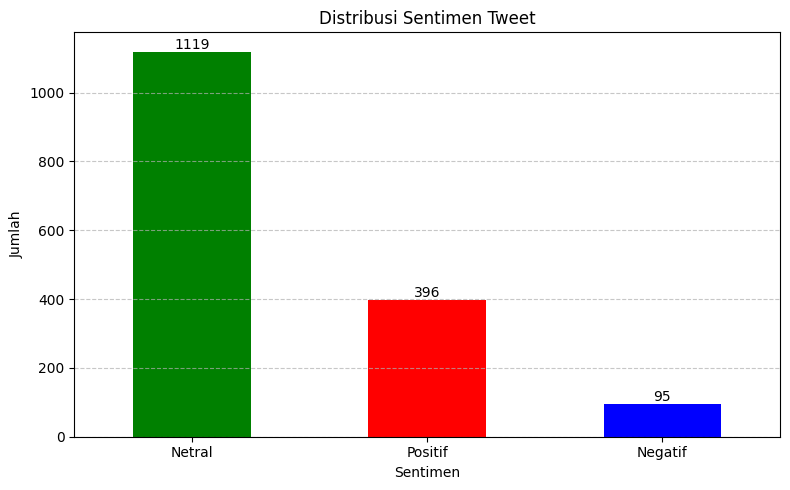

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset dari file CSV
file_path = "tweets_sentiment_baru.csv"  # Ganti dengan nama file CSV kamu
df = pd.read_csv(file_path)

# Hitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Buat grafik batang
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)  # Mengatur rotasi label sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai di atas batang
for index, value in enumerate(sentiment_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Tampilkan grafik
plt.tight_layout()
plt.show()

Contoh data positive, negative, dan neutral

In [ ]:
file_path = "tweets_sentiment_baru.csv"  # Ganti dengan nama file CSV kamu
df = pd.read_csv(file_path)

# Load dataset dari file CSV
file_path = "tweets_sentiment_baru.csv"  # Ganti dengan nama file CSV kamu
df = pd.read_csv(file_path)

# Filter tweet dengan sentimen positif
positive_tweets = df[df['sentiment'] == 'Positif']

# Tampilkan 10 tweet positif
print("10 Tweet dengan Sentimen Positif:")
print(positive_tweets['cleaned_text'].head(10))  # Ganti 'cleaned_text' dengan nama kolom yang sesuai jika berbeda

10 Tweet dengan Sentimen Positif:
3     dxn herbal alami terbuat dari ekstrak sambilot...
9     bagian jenov bagian war bagian yg romantis ada...
24    tanaman obat tradisional brotowali memiliki be...
26    brotolawi bahan herbal dengan rasa yang sangat...
31                   manfaat dan efek samping brotowali
32    manfaat brotowali untuk kesehatan salah satuny...
33    coba berikan minuman herbal warisan leluhur ki...
36    semua yg terasa manis tidak selamanya baik con...
37    foto daun brotowali resep daun brotowali untuk...
38    mnafaat daun brotowali manfaat daun brotowali ...
Name: cleaned_text, dtype: object


In [ ]:
# Load dataset dari file CSV
file_path = "tweets_sentiment_baru.csv"  # Ganti dengan nama file CSV kamu
df = pd.read_csv(file_path)

# Filter tweet dengan sentimen Negatif
positive_tweets = df[df['sentiment'] == 'Negatif']

# Tampilkan 10 tweet Negatif
print("10 Tweet dengan Sentimen Negatif:")
print(positive_tweets['cleaned_text'].head(10))  # Ganti 'cleaned_text' dengan nama kolom yang sesuai jika berbeda

10 Tweet dengan Sentimen Negatif:
4     solusi atasi kencing manis diabetes melitus ce...
5     cek bio insuleaf solusi atasi kencing manis di...
6     cek bio insuleaf solusi atasi kencing manis di...
7     luqman al hakim berkata kepada anaknya wahai a...
12    brotowali bisa digunakan untuk ibu yg berupaya...
15    cek bio insuleaf solusi atasi kencing manis di...
16    cek bio insuleaf solusi atasi kencing manis di...
17    cek bio insuleaf solusi atasi kencing manis di...
19    layaknya bumi akan selamanya berputar begitu h...
23    selain pengobatan medis kanker payudara juga b...
Name: cleaned_text, dtype: object


In [ ]:
# Load dataset dari file CSV
file_path = "tweets_sentiment_baru.csv"  # Ganti dengan nama file CSV kamu
df = pd.read_csv(file_path)

# Filter tweet dengan sentimen Netral
positive_tweets = df[df['sentiment'] == 'Netral']

# Tampilkan 10 tweet Netral
print("10 Tweet dengan Sentimen netral:")
print(positive_tweets['cleaned_text'].head(10))  # Ganti 'cleaned_text' dengan nama kolom yang sesuai jika berbeda

10 Tweet dengan Sentimen netral:
0     menghadirkan tanaman multifungsi brotowali di ...
1     yups soalnya aku suka minum herbal juga kecual...
2     brotowali itu pwaittttttt banget kata nenek ba...
8     beras kencur temulawak kunir asem sama brotowa...
10    brotowali itu tumbuhann yg rasanya paitt bgt t...
11    jumpa lagi dengan ramu rabu jamu masyarakat in...
13    brotowali ngga tuuuuhhh ngebayangin aja ga mau...
14    rokoknya dicampuri beras kencur kunyit jahe br...
18    brotowali obat gatal kulit eksim alergi bidura...
20    arsa handaru lewis jamu sehat saya ada trauma ...
Name: cleaned_text, dtype: object


seleksi data manual

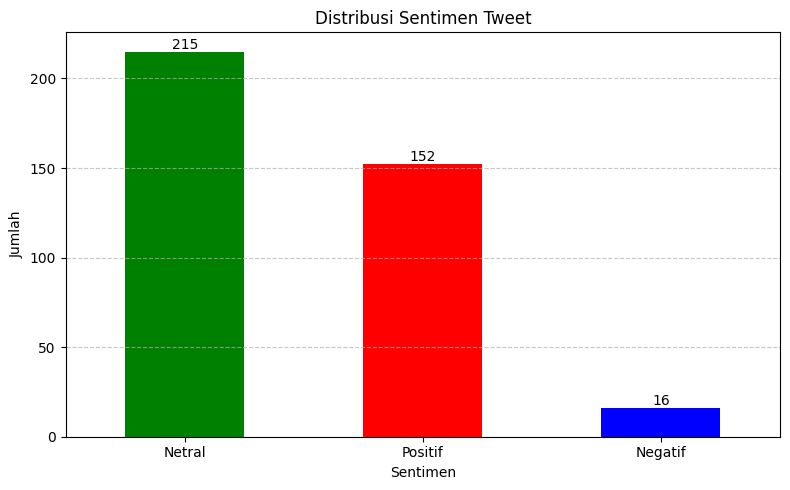

In [ ]:
# Load dataset dari file CSV
file_path = "/content/tweets_sentiment_baru_manual.xlsx"  # Ganti dengan nama file CSV kamu
df = pd.read_excel(file_path) # Changed to read_excel

# Hitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Buat grafik batang
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)  # Mengatur rotasi label sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai di atas batang
for index, value in enumerate(sentiment_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Tampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# Load dataset dari file CSV
file_path = "/content/tweets_sentiment_baru_manual.xlsx"  # Ganti dengan nama file CSV kamu
df = pd.read_excel(file_path)
df.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment
0,1728957096895688960,Mon Nov 27 02:01:10 +0000 2023,brotowali itu pWAITTTTTTT banget kata nenek ba...,https://x.com/tenkadaihiji/status/172895710470...,True,brotowali itu pwaittttttt banget kata nenek ba...,Positif
1,1695357558197010944,Sat Aug 26 09:00:55 +0000 2023,@Squishymandacil Bagian JeNov bagian war. Bagi...,https://x.com/bumbu__kacang/status/16953606639...,True,bagian jenov bagian war bagian yg romantis ada...,Positif
2,1692212944904598016,Thu Aug 17 16:37:40 +0000 2023,@Enhaluvx_ brotowali itu tumbuhann yg rasanya ...,https://x.com/hoonpetalss/status/1692214117279...,True,brotowali itu tumbuhann yg rasanya paitt bgt t...,Positif
3,1684707057315033088,Fri Jul 28 13:51:22 +0000 2023,@_artemins Brotowali ngga tuuuuhhh ... ngebaya...,https://x.com/mochikook2s1d/status/16849245114...,True,brotowali ngga tuuuuhhh ngebayangin aja ga mau...,Netral
4,1675299348262043904,Sun Jul 02 00:24:24 +0000 2023,Layaknya bumi akan selamanya berputar. Begitu ...,https://x.com/KementerianLHK/status/1675299348...,True,layaknya bumi akan selamanya berputar begitu h...,Positif


In [ ]:
df['jumlah_karakter'] = df['cleaned_text'].apply(len)
df.to_csv('tweet_sentimen_jumlah_karakter.csv', index=False)

hitung karakter

In [ ]:
# Langkah 1: Mencari jumlah karakter terbanyak
jumlah_terbanyak = df['jumlah_karakter'].max()

# Langkah 2: Mencari tweet yang memiliki jumlah karakter terbanyak
tweet_terbanyak = df[df['jumlah_karakter'] == jumlah_terbanyak]

# Menampilkan hasil
print(f"Jumlah karakter terbanyak: {jumlah_terbanyak}")
print("Tweet dengan jumlah karakter terbanyak:")
print(tweet_terbanyak)

Jumlah karakter terbanyak: 279
Tweet dengan jumlah karakter terbanyak:
                 id_str                      created_at  \
26  1665265597477708032  Mon Jun 05 09:20:03 +0000 2023   

                                            full_text  \
26  @Bett01829804 Sunda=Cecendet Ciplukan byk manf...   

                                            tweet_url  is_indonesian  \
26  https://x.com/Kadrun_TiSunda/status/1665649674...           True   

                                         cleaned_text sentiment  \
26  sunda cecendet ciplukan byk manfaatnya ngatasi...   Positif   

    jumlah_karakter  
26              279  


Data yang didapat (dari scraping dan crawling) kemudian di preprocessing untuk pemecahan data, yang kemudian akan menjadi rasio pemecahan data 80:10:10

In [ ]:
pip install pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca dataset
df = pd.read_excel('/content/tweets_sentiment_baru_manual.xlsx')
total_data = len(df)

# Hitung target jumlah untuk masing-masing split
target_train = 306
target_validation = 38
target_test = 39

# Langkah 1: Pisahkan data menjadi Train dan Temp
train_size = target_train / total_data
train_df, temp_df = train_test_split(
    df,
    train_size=train_size,
    random_state=42,
    stratify=df['label'] if 'label' in df.columns else None
)

# Langkah 2: Pisahkan Temp menjadi Validation dan Test dengan jumlah exact
# Hitung test_size yang akan menghasilkan exactly target_test samples

# Instead of calculating test_size, directly specify the number of samples
# for validation and test sets using the remaining data in temp_df.
remaining_samples = len(temp_df)
validation_size = target_validation  # Use target_validation directly
test_size = remaining_samples - validation_size # Calculate test_size based on remaining samples

# Ensure validation_size and test_size are within the bounds of remaining_samples
validation_size = min(validation_size, remaining_samples)
test_size = remaining_samples - validation_size


validation_df, test_df = train_test_split(
    temp_df,
    test_size=test_size,
    random_state=42,
    stratify=temp_df['label'] if 'label' in df.columns else None
)

# Verifikasi ukuran sebelum menyimpan
print("\nVerifikasi jumlah data:")
print(f"Total data: {total_data}")
print(f"Train: {len(train_df)} (target: {target_train})")
print(f"Validation: {len(validation_df)} (target: {target_validation})")
print(f"Test: {len(test_df)} (target: {target_test})")

# Double check sebelum menyimpan
# Adjust assertions to reflect possible differences due to rounding/stratification
assert len(train_df) == target_train, f"Train size mismatch: {len(train_df)} != {target_train}"
assert abs(len(validation_df) - target_validation) <= 1, f"Validation size mismatch: {len(validation_df)} != {target_validation}"  # Allow a difference of 1
assert abs(len(test_df) - target_test) <= 1, f"Test size mismatch: {len(test_df)} != {target_test}"  # Allow a difference of 1


# Simpan ke file CSV
train_df.to_csv('train.csv', index=False)
validation_df.to_csv('validation.csv', index=False)
test_df.to_csv('test.csv', index=False)

# Verifikasi file yang tersimpan
train_saved = pd.read_csv('train.csv')
validation_saved = pd.read_csv('validation.csv')
test_saved = pd.read_csv('test.csv')

print("\nVerifikasi file tersimpan:")
print(f"Train file: {len(train_saved)} baris")
print(f"Validation file: {len(validation_saved)} baris")
print(f"Test file: {len(test_saved)} baris")


Verifikasi jumlah data:
Total data: 383
Train: 306 (target: 306)
Validation: 38 (target: 38)
Test: 39 (target: 39)

Verifikasi file tersimpan:
Train file: 306 baris
Validation file: 38 baris
Test file: 39 baris


In [ ]:
data_train = pd.read_csv("/content/train.csv")
data_train.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment
0,1348169756033969920,Sun Jan 10 07:28:12 +0000 2021,Herbal diabetes yang ada di pasaran: - kolagit...,https://x.com/aewin86/status/1348169756033970176,True,herbal diabetes yang ada di pasaran kolagit da...,Netral
1,1300427555556724992,2024-12-15 10:35:43+00:00,RT @bluedaisieso: Pooh is super sweet 😭😭\nLook...,https://twitter.com/twitter/status/18682435357...,True,pooh is super sweet look at his smile manis bg...,Netral
2,1359855804334051072,Fri Feb 12 14:57:06 +0000 2021,@Sukirno08192311 Tumbuk daun sambiloto trs tem...,https://x.com/DjokoErlangga/status/13602415244...,True,tumbuk daun sambiloto trs tempelkan pd yg luka...,Positif
3,1725402358509867008,Fri Nov 17 06:35:55 +0000 2023,Ketumbar dapat diolah dengan ditambahkan sebag...,https://x.com/pkjn_rsmmbogor/status/1725402366...,True,ketumbar dapat diolah dengan ditambahkan sebag...,Positif
4,1762371140205605120,2024-12-15 14:56:22+00:00,@waudira Jangan terlalu manis nanti diabetes,https://twitter.com/twitter/status/18683091276...,True,jangan terlalu manis nanti diabetes,Netral


In [ ]:
data_validation = pd.read_csv("/content/validation.csv")
data_validation.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment
0,1043480382534865024,2024-12-15 10:02:33+00:00,@BaseAnakFK “apakah anggota keluarga ada yang ...,https://twitter.com/twitter/status/18682351859...,True,apakah anggota keluarga ada yang pernah mengal...,Netral
1,1370394626884997120,2024-12-15 05:57:04+00:00,@waudira Bisa sampek diabetes ya,https://twitter.com/twitter/status/18681734101...,True,bisa sampek diabetes ya,Netral
2,3612796874,2024-12-15 08:42:06+00:00,Sarapan Sehat dengan Vitameal!\nJangan skip sa...,https://twitter.com/twitter/status/18682149407...,True,sarapan sehat dengan vitameal jangan skip sara...,Positif
3,1823963622080688128,2024-12-15 05:14:32+00:00,RT @AllianzID: Banyak banget mitos yang bereda...,https://twitter.com/twitter/status/18681627068...,True,banyak banget mitos yang beredar tentang diabe...,Netral
4,1360264624185090048,2024-12-15 14:08:22+00:00,@aprilsballad @divazhh abis ini kaki lu buntun...,https://twitter.com/twitter/status/18682970490...,True,abis ini kaki lu buntung diabetes,Netral


In [ ]:
data_test = pd.read_csv("/content/test.csv")
data_test.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment
0,1738826750157873920,Sun Dec 24 07:40:29 +0000 2023,Kapsul Kutuk Khutuk Herbal - Original Kapsul ...,https://x.com/txtdronline/status/1738826966504...,True,kapsul kutuk khutuk herbal original kapsul pen...,Netral
1,99619075,2024-12-15 10:18:27+00:00,@zoelfick Tp beliau tydak kebal diabetes,https://twitter.com/twitter/status/18682391888...,True,tp beliau tydak kebal diabetes,Netral
2,1834745976114102016,2024-12-15 14:22:17+00:00,@GleamHanni Kalau aku makan duren... bangun ti...,https://twitter.com/twitter/status/18683005513...,True,kalau aku makan duren bangun tidur duren malem...,Netral
3,1816790423291198976,2024-12-15 13:14:59+00:00,6. Mengontrol kadar gula darah\nKecipir mengan...,https://twitter.com/twitter/status/18682836159...,True,mengontrol kadar gula darah kecipir mengandung...,Positif
4,1738439292459066112,Sat Dec 23 06:00:00 +0000 2023,Bisa Turunkan Kolesterol hingga Cegah Diabetes...,https://x.com/ThePhraseID/status/1738439292459...,True,bisa turunkan kolesterol hingga cegah diabetes...,Positif


In [ ]:
#ini ga dipake #

''' import pandas as pd
from sklearn.model_selection import train_test_split

def split_sentiment_dataset(csv_path, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    """
    Membagi dataset sentiment analysis menjadi train, validation, dan test set
    dengan proporsi 80-10-10

    Parameters:
    -----------
    csv_path : str
        Path ke file CSV
    train_size : float
        Proporsi data training (default: 0.8)
    val_size : float
        Proporsi data validasi (default: 0.1)
    test_size : float
        Proporsi data testing (default: 0.1)
    random_state : int
        Random seed untuk reproducibility

    Returns:
    --------
    train_df, val_df, test_df : tuple of pandas.DataFrame
        DataFrame yang sudah dipisah
    """

    # Membaca dataset
    df = pd.read_csv(csv_path)

    # Memastikan total proporsi adalah 1
    assert train_size + val_size + test_size == 1.0

    # Pertama split menjadi train dan temporary set
    temp_size = val_size + test_size
    train_df, temp_df = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df['sentiment']  # Ganti 'sentiment' dengan nama kolom label Anda
    )

    # Kemudian split temporary set menjadi validation dan test
    relative_val_size = val_size / (val_size + test_size)
    val_df, test_df = train_test_split(
        temp_df,
        train_size=relative_val_size,
        random_state=random_state,
        stratify=temp_df['sentiment']  # Ganti 'sentiment' dengan nama kolom label Anda
    )

    # Mencetak informasi distribusi
    print("\nDistribusi Label:")
    print("\nTraining Set (80%):")
    print(train_df['sentiment'].value_counts(normalize=True))
    print("\nValidation Set (10%):")
    print(val_df['sentiment'].value_counts(normalize=True))
    print("\nTest Set (10%):")
    print(test_df['sentiment'].value_counts(normalize=True))

    # Mencetak ukuran masing-masing set
    print("\nUkuran Dataset:")
    print(f"Total: {len(df)} samples")
    print(f"Training: {len(train_df)} samples ({len(train_df)/len(df)*100:.1f}%)")
    print(f"Validation: {len(val_df)} samples ({len(val_df)/len(df)*100:.1f}%)")
    print(f"Testing: {len(test_df)} samples ({len(test_df)/len(df)*100:.1f}%)")

    # Menyimpan hasil split ke file CSV baru
    train_df.to_csv('train_data.csv', index=False)
    val_df.to_csv('val_data.csv', index=False)
    test_df.to_csv('test_data.csv', index=False)

    return train_df, val_df, test_df

# Contoh penggunaan:
if __name__ == "__main__":
    # Ganti 'your_dataset.csv' dengan path ke file CSV Anda
    csv_path = '/content/tweet_sentimen_jumlah_karakter.csv'

    # Menggunakan proporsi 80-10-10
    train_data, val_data, test_data = split_sentiment_dataset(
        csv_path,
        train_size=0.8,
        val_size=0.1,
        test_size=0.1
    )


Distribusi Label:

Training Set (80%):
sentiment
Netral     0.562092
Positif    0.395425
Negatif    0.042484
Name: proportion, dtype: float64

Validation Set (10%):
sentiment
Netral     0.552632
Positif    0.394737
Negatif    0.052632
Name: proportion, dtype: float64

Test Set (10%):
sentiment
Netral     0.564103
Positif    0.410256
Negatif    0.025641
Name: proportion, dtype: float64

Ukuran Dataset:
Total: 383 samples
Training: 306 samples (79.9%)
Validation: 38 samples (9.9%)
Testing: 39 samples (10.2%)


### Pre-Trained IndoBERT

In [ ]:
# pre-trained with indobert base P2 Version
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# pre-trained with indoBERTweet base
best_params = {'dropout': 0.1}
model2 = AutoModelForSequenceClassification.from_pretrained("indolem/indobertweet-base-uncased", num_labels=3, hidden_dropout_prob=best_params["dropout"])
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased", num_labels=3)

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# pre-trained with indoBERTweet base
# Initialize best_params with some default values or run your optimization process first
best_params = {'dropout': 0.1}  # Replace 0.1 with your desired default dropout value
                                # or the actual value from your optimization results

model2 = AutoModelForSequenceClassification.from_pretrained("indolem/indobertweet-base-uncased", num_labels=3, hidden_dropout_prob=best_params["dropout"])
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Tokenized

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer
from tqdm import tqdm

def tokenize_dataset(data_path, output_path, max_length=128):
    """
    Melakukan tokenisasi dataset menggunakan IndoBERTweet tokenizer.

    Parameters:
    -----------
    data_path : str
        Path ke file CSV dataset.
    output_path : str
        Path untuk menyimpan dataset hasil tokenisasi.
    max_length : int
        Panjang maksimum sequence (default: 128).

    Returns:
    --------
    DataFrame dengan kolom tambahan untuk input_ids, attention_mask, dan token_type_ids.
    """

    # Baca dataset
    try:
        df = pd.read_csv(data_path)
        if 'cleaned_text' not in df.columns:
            raise ValueError("Kolom 'cleaned_text' tidak ditemukan dalam dataset.")
    except Exception as e:
        print(f"Error membaca file: {e}")
        return None

    # Inisialisasi list untuk menyimpan hasil tokenisasi
    input_ids_list = []
    attention_masks_list = []
    token_type_ids_list = []

    # Tokenisasi setiap teks dalam kolom `tweet_cleaned`
    print(f"Memulai tokenisasi pada dataset: {data_path}")
    for text in tqdm(df['cleaned_text'], desc="Tokenizing"):
        try:
            # Encode tweet
            encoding = tokenizer.encode_plus(
                str(text),                  # Pastikan teks dalam bentuk string
                add_special_tokens=True,    # Menambahkan [CLS] dan [SEP]
                max_length=max_length,      # Maksimum panjang sequence
                padding='max_length',       # Pad ke max_length
                truncation=True,            # Potong jika melebihi max_length
                return_attention_mask=True, # Mengembalikan attention mask
                return_token_type_ids=True, # Mengembalikan token type IDs
                return_tensors='pt'         # Return sebagai PyTorch tensor
            )

            # Simpan hasil encoding
            input_ids_list.append(encoding['input_ids'][0])
            attention_masks_list.append(encoding['attention_mask'][0])
            token_type_ids_list.append(encoding['token_type_ids'][0])

        except Exception as e:
            print(f"Tokenisasi gagal untuk teks: {text} dengan error: {e}")

    # Konversi list hasil tokenisasi ke format yang dapat disimpan
    df['input_ids'] = [x.tolist() for x in input_ids_list]
    df['attention_mask'] = [x.tolist() for x in attention_masks_list]
    df['token_type_ids'] = [x.tolist() for x in token_type_ids_list]

    # Simpan dataset hasil tokenisasi ke file CSV
    df.to_csv(output_path, index=False)
    print(f"Dataset hasil tokenisasi disimpan di: {output_path}")

    # Informasi tambahan
    print("\nContoh hasil tokenisasi untuk tweet pertama:")
    example_text = df['cleaned_text'].iloc[0]
    print(f"Teks asli: {example_text}")
    tokens = tokenizer.convert_ids_to_tokens(input_ids_list[0])
    print(f"Hasil tokenisasi: {tokens}")

    return df


# Contoh penggunaan
if __name__ == "__main__":
    # Tokenisasi dataset training
    train_tokenized = tokenize_dataset(
        data_path='train.csv',
        output_path='train_tokenized.csv'
    )

    # Tokenisasi dataset validasi
    val_tokenized = tokenize_dataset(
        data_path='validation.csv',
        output_path='val_tokenized.csv'
    )

    # Tokenisasi dataset testing
    test_tokenized = tokenize_dataset(
        data_path='test.csv',
        output_path='test_tokenized.csv'
    )


Memulai tokenisasi pada dataset: train.csv


Tokenizing: 100%|██████████| 306/306 [00:00<00:00, 2446.73it/s]

Dataset hasil tokenisasi disimpan di: train_tokenized.csv

Contoh hasil tokenisasi untuk tweet pertama:
Teks asli: herbal diabetes yang ada di pasaran kolagit dari tebu lokal jamsi sambiloto mengkudu kurkuma mahkota dewa dll lokal guci cina ada lagi


Hasil tokenisasi: ['[CLS]', 'herbal', 'diabetes', 'yang', 'ada', 'di', 'pasaran', 'kol', '##agi', '##t', 'dari', 'tebu', 'lokal', 'jam', '##si', 'sambil', '##oto', 'mengkudu', 'kur', '##kum', '##a', 'mahkota', 'dewa', 'dll', 'lokal', 'gu', '##ci', 'cina', 'ada', 'lagi', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 

Tokenizing: 100%|██████████| 38/38 [00:00<00:00, 2000.32it/s]


Dataset hasil tokenisasi disimpan di: val_tokenized.csv

Contoh hasil tokenisasi untuk tweet pertama:
Teks asli: apakah anggota keluarga ada yang pernah mengalami hal yang sama sebelumnya apakah ada riwayat hipeensi dan diabetes
Hasil tokenisasi: ['[CLS]', 'apakah', 'anggota', 'keluarga', 'ada', 'yang', 'pernah', 'mengalami', 'hal', 'yang', 'sama', 'sebelumnya', 'apakah', 'ada', 'riwayat', 'hip', '##een', '##si', 'dan', 'diabetes', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]

Tokenizing: 100%|██████████| 39/39 [00:00<00:00, 1926.55it/s]

Dataset hasil tokenisasi disimpan di: test_tokenized.csv

Contoh hasil tokenisasi untuk tweet pertama:
Teks asli: kapsul kutuk khutuk herbal original kapsul pengering luka diabetes link
Hasil tokenisasi: ['[CLS]', 'kapsul', 'kutu', '##k', 'kh', '##utu', '##k', 'herbal', 'original', 'kapsul', 'pengering', 'luka', 'diabetes', 'link', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 

In [ ]:
data_train = pd.read_csv("/content/train_tokenized.csv")
data_train.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment,input_ids,attention_mask,token_type_ids
0,1348169756033969920,Sun Jan 10 07:28:12 +0000 2021,Herbal diabetes yang ada di pasaran: - kolagit...,https://x.com/aewin86/status/1348169756033970176,True,herbal diabetes yang ada di pasaran kolagit da...,Netral,"[2, 2797, 5484, 34, 176, 26, 5960, 1159, 195, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1300427555556724992,2024-12-15 10:35:43+00:00,RT @bluedaisieso: Pooh is super sweet 😭😭\nLook...,https://twitter.com/twitter/status/18682435357...,True,pooh is super sweet look at his smile manis bg...,Netral,"[2, 1834, 279, 374, 2721, 17313, 15848, 117, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1359855804334051072,Fri Feb 12 14:57:06 +0000 2021,@Sukirno08192311 Tumbuk daun sambiloto trs tem...,https://x.com/DjokoErlangga/status/13602415244...,True,tumbuk daun sambiloto trs tempelkan pd yg luka...,Positif,"[2, 27139, 2322, 2076, 758, 21565, 27300, 2775...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1725402358509867008,Fri Nov 17 06:35:55 +0000 2023,Ketumbar dapat diolah dengan ditambahkan sebag...,https://x.com/pkjn_rsmmbogor/status/1725402366...,True,ketumbar dapat diolah dengan ditambahkan sebag...,Positif,"[2, 22805, 2257, 173, 8577, 79, 6903, 242, 835...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1762371140205605120,2024-12-15 14:56:22+00:00,@waudira Jangan terlalu manis nanti diabetes,https://twitter.com/twitter/status/18683091276...,True,jangan terlalu manis nanti diabetes,Netral,"[2, 843, 1386, 3603, 2036, 5484, 3, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# Load the tokenized data
train_df = pd.read_csv('train_tokenized.csv')
val_df = pd.read_csv('val_tokenized.csv')
test_df = pd.read_csv('test_tokenized.csv')

def predict_sentiment(text, model, tokenizer):
    """Predicts the sentiment of a text using the loaded model."""
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits).item()

    # Map predicted class to sentiment label
    label_mapping = {0: 'Positif', 1: 'Netral', 2: 'Negatif'}
    return label_mapping[predicted_class]

def categorize_sentiment(df, actual_col='sentiment', predicted_col='predicted_sentiment'):
    """
    Categorizes sentiment analysis results into TN, FN, TP, FP, and Neutral.
    Also, tokenizes based on whether the prediction is True or False.
    """

    # Define a simple tokenizer (you might want to use a more advanced one)
    def simple_tokenizer(text):
        return text.lower().split()  # Splits text into words

    # Add new columns for categorization and tokenization
    df['category'] = ''  # Initialize category column
    df['tokens'] = ''    # Initialize tokens column

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        actual_sentiment = row[actual_col]
        predicted_sentiment = row[predicted_col]

        # Categorize based on predicted and actual sentiment
        if actual_sentiment == predicted_sentiment:
            if actual_sentiment == 'Positif':
                df.loc[index, 'category'] = 'TP'  # True Positive
            elif actual_sentiment == 'Negatif':
                df.loc[index, 'category'] = 'TN'  # True Negative
            else:
                df.loc[index, 'category'] = 'Neutral' # Neutral
            df.loc[index, 'tokens'] = " ".join(simple_tokenizer(row['cleaned_text'])) # Tokenize for True predictions, join the tokens back into a string
        else:
            if actual_sentiment == 'Positif' and predicted_sentiment == 'Negatif':
                df.loc[index, 'category'] = 'FN'  # False Negative
            elif actual_sentiment == 'Negatif' and predicted_sentiment == 'Positif':
                df.loc[index, 'category'] = 'FP'  # False Positive
            else:
                df.loc[index, 'category'] = 'Other Error'  # Other errors
            df.loc[index, 'tokens'] = " ".join(simple_tokenizer(row['cleaned_text'])) # Tokenize for False predictions, join the tokens back into a string

    return df

# Predict sentiment for each tweet and store in 'predicted_sentiment' column
train_df['predicted_sentiment'] = train_df['cleaned_text'].apply(lambda text: predict_sentiment(text, model, tokenizer))
val_df['predicted_sentiment'] = val_df['cleaned_text'].apply(lambda text: predict_sentiment(text, model, tokenizer))
test_df['predicted_sentiment'] = test_df['cleaned_text'].apply(lambda text: predict_sentiment(text, model, tokenizer))

# Now categorize the sentiment results
train_df = categorize_sentiment(train_df)
print(train_df.head())

val_df = categorize_sentiment(val_df)
test_df = categorize_sentiment(test_df)

                id_str                      created_at  \
0  1348169756033969920  Sun Jan 10 07:28:12 +0000 2021   
1  1300427555556724992       2024-12-15 10:35:43+00:00   
2  1359855804334051072  Fri Feb 12 14:57:06 +0000 2021   
3  1725402358509867008  Fri Nov 17 06:35:55 +0000 2023   
4  1762371140205605120       2024-12-15 14:56:22+00:00   

                                           full_text  \
0  Herbal diabetes yang ada di pasaran: - kolagit...   
1  RT @bluedaisieso: Pooh is super sweet 😭😭\nLook...   
2  @Sukirno08192311 Tumbuk daun sambiloto trs tem...   
3  Ketumbar dapat diolah dengan ditambahkan sebag...   
4       @waudira Jangan terlalu manis nanti diabetes   

                                           tweet_url  is_indonesian  \
0   https://x.com/aewin86/status/1348169756033970176           True   
1  https://twitter.com/twitter/status/18682435357...           True   
2  https://x.com/DjokoErlangga/status/13602415244...           True   
3  https://x.com/pkjn_rsmmbogo

In [ ]:
train_df.to_csv('train_df.csv', index=False)
val_df.to_csv('val_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

<ipython-input-12-562207a9f93d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_categories) # Use a colormap
<ipython-input-12-562207a9f93d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))
<ipython-input-12-562207a9f93d>:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))


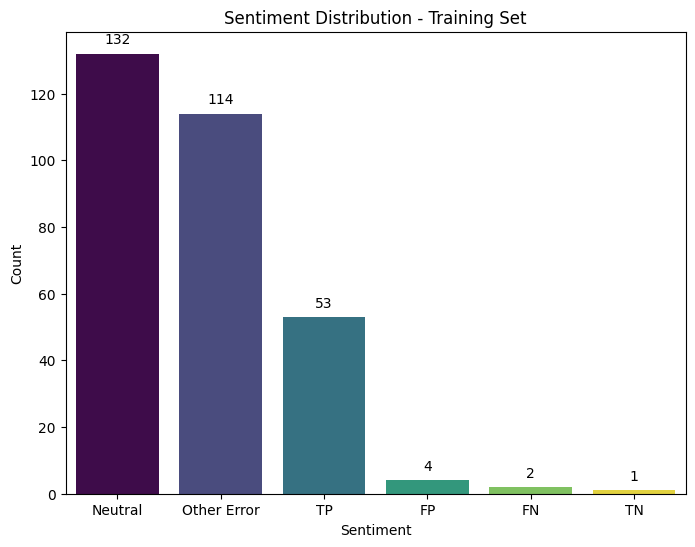

<ipython-input-12-562207a9f93d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_categories) # Use a colormap
<ipython-input-12-562207a9f93d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))
<ipython-input-12-562207a9f93d>:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))


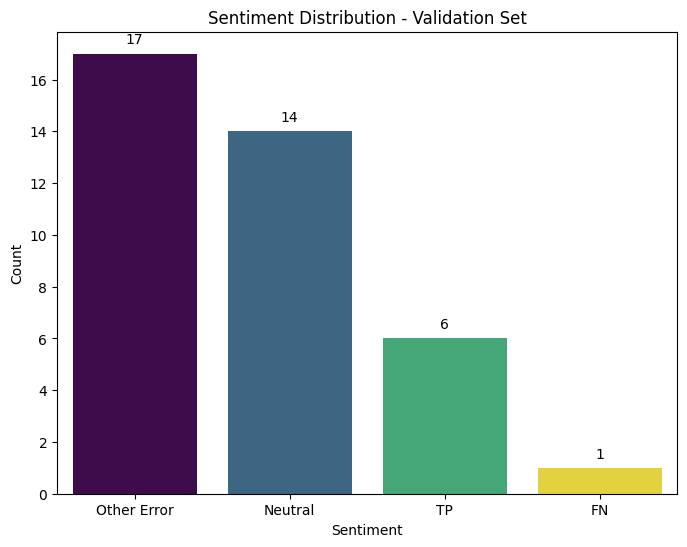

<ipython-input-12-562207a9f93d>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_categories) # Use a colormap
<ipython-input-12-562207a9f93d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))
<ipython-input-12-562207a9f93d>:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))


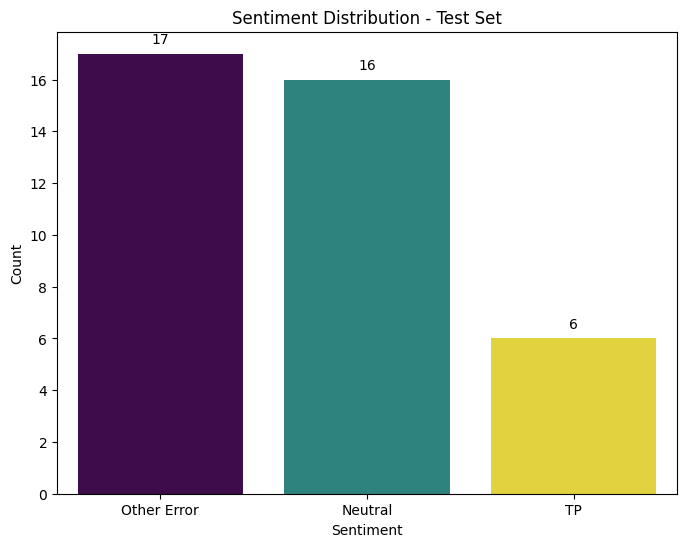

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Assuming your CSV files are named train_df.csv, val_df.csv, and test_df.csv
train_df = pd.read_csv("/content/train_df.csv") # Load train_df
val_df = pd.read_csv("/content/val_df.csv") # Load val_df
test_df = pd.read_csv("/content/test_df.csv") # Load test_df

def plot_sentiment_distribution(df, title):
    sentiment_counts = df['category'].value_counts()

    # Define a color palette with enough colors for all categories
    num_categories = len(sentiment_counts)
    colors = plt.cm.get_cmap('viridis', num_categories) # Use a colormap

    plt.figure(figsize=(8, 6))

    # Create the bar plot with custom colors
    ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors(np.arange(num_categories)))

    plt.title(f'Sentiment Distribution - {title}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

    # Add value labels above the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

    plt.show()

# Now you can use train_df, val_df, and test_df in the function calls
plot_sentiment_distribution(train_df, 'Training Set')
plot_sentiment_distribution(val_df, 'Validation Set')
plot_sentiment_distribution(test_df, 'Test Set')

# Bagian Fine Tuning

In [ ]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

def create_dataloader(df, batch_size):
    input_ids = torch.tensor([ast.literal_eval(x) for x in df['input_ids'].tolist()])
    attention_mask = torch.tensor([ast.literal_eval(x) for x in df['attention_mask'].tolist()])

    label_mapping = {'Positif': 0, 'Netral': 1, 'Negatif': 2}
    labels = torch.tensor([label_mapping[label] for label in df['sentiment'].tolist()])

    dataset = TensorDataset(input_ids, attention_mask, labels)

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True
    )

    return dataloader

def train_and_evaluate(model, train_dataloader, val_dataloader, optimizer, scheduler, device, num_epochs):
    best_val_f1 = 0
    best_model = None

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_steps = 0

        for batch in tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            optimizer.zero_grad()

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            train_loss += loss.item()
            train_steps += 1

            loss.backward()
            optimizer.step()
            scheduler.step()

        avg_train_loss = train_loss / train_steps

        model.eval()
        val_preds = []
        val_true = []

        with torch.no_grad():
            for batch in val_dataloader:
                input_ids = batch[0].to(device)
                attention_mask = batch[1].to(device)
                labels = batch[2].to(device)

                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask
                )

                preds = torch.argmax(outputs.logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        val_f1 = f1_score(val_true, val_preds, average='weighted')

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model = model.state_dict().copy()

        print(f'Epoch {epoch+1}:')
        print(f'Average training loss: {avg_train_loss:.4f}')
        print(f'Validation F1-Score: {val_f1:.4f}')

    return best_model, best_val_f1

if __name__ == "__main__":
    # Load data
    train_data = pd.read_csv('train_df.csv')
    val_data = pd.read_csv('val_df.csv')

    # Set hyperparameters
    batch_size = 16
    learning_rate = 2e-5
    weight_decay = 0.01
    num_epochs = 10
    warmup_steps = 0

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(
        "indolem/indobertweet-base-uncased",
        num_labels=3
    ).to(device)

    # Create dataloaders
    train_dataloader = create_dataloader(train_data, batch_size)
    val_dataloader = create_dataloader(val_data, batch_size)

    # Setup optimizer and scheduler
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay
    )

    total_steps = len(train_dataloader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=total_steps
    )

    # Train and evaluate
    best_model_state, best_val_f1 = train_and_evaluate(
        model, train_dataloader, val_dataloader, optimizer, scheduler, device, num_epochs
    )

    # Save best model
    torch.save(best_model_state, 'best_finetuned_model.pt')

    print(f"Best Validation F1-Score: {best_val_f1:.4f}")


Using device: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/10: 100%|██████████| 20/20 [07:23<00:00, 22.16s/it]


Epoch 1:
Average training loss: 0.8199
Validation F1-Score: 0.5084


Epoch 2/10: 100%|██████████| 20/20 [07:18<00:00, 21.92s/it]


Epoch 2:
Average training loss: 0.7104
Validation F1-Score: 0.5017


Epoch 3/10: 100%|██████████| 20/20 [07:21<00:00, 22.05s/it]


Epoch 3:
Average training loss: 0.6037
Validation F1-Score: 0.5634


Epoch 4/10: 100%|██████████| 20/20 [07:18<00:00, 21.91s/it]


Epoch 4:
Average training loss: 0.5044
Validation F1-Score: 0.6142


Epoch 5/10: 100%|██████████| 20/20 [07:17<00:00, 21.87s/it]


Epoch 5:
Average training loss: 0.4178
Validation F1-Score: 0.6161


Epoch 6/10: 100%|██████████| 20/20 [07:20<00:00, 22.01s/it]


Epoch 6:
Average training loss: 0.3273
Validation F1-Score: 0.6425


Epoch 7/10: 100%|██████████| 20/20 [07:15<00:00, 21.79s/it]


Epoch 7:
Average training loss: 0.2384
Validation F1-Score: 0.6174


Epoch 8/10: 100%|██████████| 20/20 [07:20<00:00, 22.00s/it]


Epoch 8:
Average training loss: 0.2062
Validation F1-Score: 0.6430


Epoch 9/10: 100%|██████████| 20/20 [07:17<00:00, 21.88s/it]


Epoch 9:
Average training loss: 0.1754
Validation F1-Score: 0.6174


Epoch 10/10: 100%|██████████| 20/20 [07:50<00:00, 23.53s/it]


Epoch 10:
Average training loss: 0.1608
Validation F1-Score: 0.6430
Best Validation F1-Score: 0.6430


## Hasil Model

In [ ]:
# prompt: cara cek tipe data dari data pada file /content/best_finetuned_model.pt

import torch

# Load the model
model_path = "/content/best_finetuned_model.pt"
loaded_model = torch.load(model_path)

# Check the type of the loaded model
print(type(loaded_model))


# If you want to inspect the model's state_dict
# for key, value in loaded_model.items():
#   print(f"Key: {key}, Type: {type(value)}, Shape: {value.shape}")

<ipython-input-63-592695b6b81a>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(model_path)


<class 'collections.OrderedDict'>


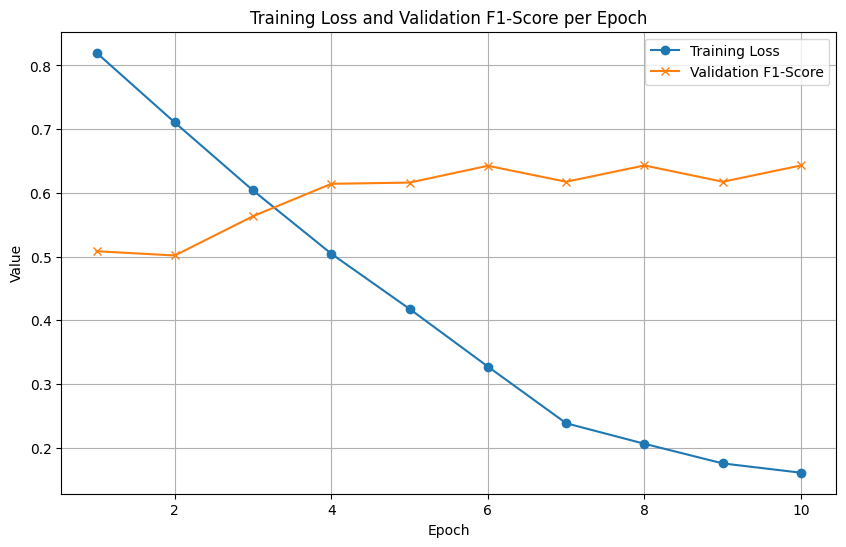

In [ ]:
data = {
    'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Training Loss': [0.8199, 0.7104, 0.6037, 0.5044, 0.4178, 0.3273, 0.2384, 0.2062, 0.1754, 0.1608],
    'Validation F1-Score': [0.5084, 0.5017, 0.5634, 0.6142, 0.6161, 0.6425, 0.6174, 0.6430, 0.6174, 0.6430]
}

df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss', marker='o')
plt.plot(df['Epoch'], df['Validation F1-Score'], label='Validation F1-Score', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Validation F1-Score per Epoch')
plt.legend()
plt.grid(True)
plt.show()

## EDA

In [ ]:
# prompt: cara menampilkan data yang mengandung tn fn fp fn neutral dan other error pada train_df.csv pada kolom 'category'

# Assuming train_df is already loaded as shown in your provided code
# Display data containing 'TN', 'FN', 'FP', 'Neutral', and 'Other Error' in the 'category' column
train_df = pd.read_csv("/content/train_df.csv") # Load train_df
val_df = pd.read_csv("/content/val_df.csv") # Load val_df
test_df = pd.read_csv("/content/test_df.csv") # Load test_df

subset_df = train_df[train_df['category'].isin(['TN', 'FN', 'FP', 'Neutral', 'Other Error'])]
subset_df

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment,input_ids,attention_mask,token_type_ids,predicted_sentiment,category,tokens
0,1348169756033969920,Sun Jan 10 07:28:12 +0000 2021,Herbal diabetes yang ada di pasaran: - kolagit...,https://x.com/aewin86/status/1348169756033970176,True,herbal diabetes yang ada di pasaran kolagit da...,Netral,"[2, 2797, 5484, 34, 176, 26, 5960, 1159, 195, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Neutral,herbal diabetes yang ada di pasaran kolagit da...
1,1300427555556724992,2024-12-15 10:35:43+00:00,RT @bluedaisieso: Pooh is super sweet 😭😭\nLook...,https://twitter.com/twitter/status/18682435357...,True,pooh is super sweet look at his smile manis bg...,Netral,"[2, 1834, 279, 374, 2721, 17313, 15848, 117, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Neutral,pooh is super sweet look at his smile manis bg...
2,1359855804334051072,Fri Feb 12 14:57:06 +0000 2021,@Sukirno08192311 Tumbuk daun sambiloto trs tem...,https://x.com/DjokoErlangga/status/13602415244...,True,tumbuk daun sambiloto trs tempelkan pd yg luka...,Positif,"[2, 27139, 2322, 2076, 758, 21565, 27300, 2775...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Other Error,tumbuk daun sambiloto trs tempelkan pd yg luka...
4,1762371140205605120,2024-12-15 14:56:22+00:00,@waudira Jangan terlalu manis nanti diabetes,https://twitter.com/twitter/status/18683091276...,True,jangan terlalu manis nanti diabetes,Netral,"[2, 843, 1386, 3603, 2036, 5484, 3, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Neutral,jangan terlalu manis nanti diabetes
5,1680421502,2024-12-15 11:21:36+00:00,@serenrenaa diabetes sayang 😭😭😭 bayangin minum...,https://twitter.com/twitter/status/18682550803...,True,diabetes sayang bayangin minum matcha ltr,Netral,"[2, 5484, 3067, 22537, 17, 2579, 18193, 30354,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Neutral,diabetes sayang bayangin minum matcha ltr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1731174972322689024,Sun Dec 03 04:54:11 +0000 2023,Obat Diabetes - Gula Darah Naik - Pengganti Gu...,https://x.com/sanfordxbpa/status/1731174972322...,True,obat diabetes gula darah naik pengganti gula b...,Positif,"[2, 925, 5484, 3637, 1410, 1908, 6680, 3637, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Other Error,obat diabetes gula darah naik pengganti gula b...
302,1715700710741040896,Sat Oct 21 12:05:00 +0000 2023,Guru Besar IPB Ungkap Herbal Antidiabetes Apa ...,https://x.com/detikcom/status/1715700710741041310,True,guru besar ipb ungkap herbal antidiabetes apa ...,Netral,"[2, 960, 421, 16684, 5396, 2797, 2480, 9970, 8...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif,Other Error,guru besar ipb ungkap herbal antidiabetes apa ...
303,981734500815126528,2024-12-15 13:09:27+00:00,"@nasxsoul2 yg diabetes pon xleh tgok, nt die g...",https://twitter.com/twitter/status/18682822208...,True,yg diabetes pon xleh tgok nt die gigih cari yg...,Netral,"[2, 741, 5484, 5438, 8408, 134, 13684, 118, 68...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Netral,Neutral,yg diabetes pon xleh tgok nt die gigih cari yg...
304,2437436822,2024-12-15 08:29:14+00:00,RT @kayoungei: @kanaya__kana Aduh kalo inipun ...,https://twitter.com/twitter/status/18682117038...,True,aduh kalo inipun unnie juga udah kenyang takut...,Netral,"[2, 14161, 1686, 19368, 78, 13337, 186, 2137, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ne

In [ ]:
data_val_df = pd.read_csv("val_df.csv")
data_val_df.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment,input_ids,attention_mask,token_type_ids,predicted_sentiment
0,1043480382534865024,2024-12-15 10:02:33+00:00,@BaseAnakFK “apakah anggota keluarga ada yang ...,https://twitter.com/twitter/status/18682351859...,True,apakah anggota keluarga ada yang pernah mengal...,Netral,"[2, 937, 1225, 1137, 176, 34, 746, 1309, 269, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
1,1370394626884997120,2024-12-15 05:57:04+00:00,@waudira Bisa sampek diabetes ya,https://twitter.com/twitter/status/18681734101...,True,bisa sampek diabetes ya,Netral,"[2, 166, 5985, 30361, 5484, 286, 3, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
2,3612796874,2024-12-15 08:42:06+00:00,Sarapan Sehat dengan Vitameal!\nJangan skip sa...,https://twitter.com/twitter/status/18682149407...,True,sarapan sehat dengan vitameal jangan skip sara...,Positif,"[2, 6499, 1705, 79, 21369, 1130, 20, 843, 1954...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
3,1823963622080688128,2024-12-15 05:14:32+00:00,RT @AllianzID: Banyak banget mitos yang bereda...,https://twitter.com/twitter/status/18681627068...,True,banyak banget mitos yang beredar tentang diabe...,Netral,"[2, 271, 2174, 9154, 34, 5823, 416, 5484, 26, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
4,1360264624185090048,2024-12-15 14:08:22+00:00,@aprilsballad @divazhh abis ini kaki lu buntun...,https://twitter.com/twitter/status/18682970490...,True,abis ini kaki lu buntung diabetes,Netral,"[2, 8778, 92, 1941, 3036, 17080, 2692, 5484, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif


In [ ]:
data_test_df = pd.read_csv("test_df.csv")
data_test_df.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment,input_ids,attention_mask,token_type_ids,predicted_sentiment
0,1738826750157873920,Sun Dec 24 07:40:29 +0000 2023,Kapsul Kutuk Khutuk Herbal - Original Kapsul ...,https://x.com/txtdronline/status/1738826966504...,True,kapsul kutuk khutuk herbal original kapsul pen...,Netral,"[2, 8762, 7271, 30361, 454, 8768, 30361, 2797,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
1,99619075,2024-12-15 10:18:27+00:00,@zoelfick Tp beliau tydak kebal diabetes,https://twitter.com/twitter/status/18682391888...,True,tp beliau tydak kebal diabetes,Netral,"[2, 3478, 2813, 4501, 13935, 19282, 5484, 3, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
2,1834745976114102016,2024-12-15 14:22:17+00:00,@GleamHanni Kalau aku makan duren... bangun ti...,https://twitter.com/twitter/status/18683005513...,True,kalau aku makan duren bangun tidur duren malem...,Netral,"[2, 599, 304, 521, 19304, 3692, 1559, 19304, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
3,1816790423291198976,2024-12-15 13:14:59+00:00,6. Mengontrol kadar gula darah\nKecipir mengan...,https://twitter.com/twitter/status/18682836159...,True,mengontrol kadar gula darah kecipir mengandung...,Positif,"[2, 8361, 4148, 3637, 1410, 384, 10811, 30359,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
4,1738439292459066112,Sat Dec 23 06:00:00 +0000 2023,Bisa Turunkan Kolesterol hingga Cegah Diabetes...,https://x.com/ThePhraseID/status/1738439292459...,True,bisa turunkan kolesterol hingga cegah diabetes...,Positif,"[2, 166, 15535, 7161, 733, 20180, 5484, 92, 15...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif


# Pelatihan Bayesian

In [ ]:
# Load datasets
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

train_dataset = Dataset.from_pandas(train_df)
valid_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Preprocess function
def preprocess_function(examples):
    return tokenizer(examples['cleaned_text'], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(preprocess_function, batched=True)
valid_dataset = valid_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Label mapping
label_mapping = {'Positif': 0, 'Netral': 1, 'Negatif': 2}

def update_labels(example):
    example['labels'] = label_mapping[example['sentiment']]
    return example

train_dataset = train_dataset.map(update_labels)
valid_dataset = valid_dataset.map(update_labels)
test_dataset = test_dataset.map(update_labels)

# Set format for PyTorch compatibility
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
valid_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# Objective function for Bayesian Optimization
def objective(trial):
    # Hyperparameter sampling
    max_seq_length = trial.suggest_int("max_seq_length", 32, 256)
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 32])
    dropout = trial.suggest_uniform("dropout", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)
    num_epochs = trial.suggest_int("num_epochs", 2, 10)

    # Model initialization
    model = AutoModelForSequenceClassification.from_pretrained(
        "indolem/indobertweet-base-uncased", num_labels=3, hidden_dropout_prob=dropout
    )

    # TrainingArguments
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        logging_dir='./logs',
        logging_steps=10,  # Log every 10 steps
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        num_train_epochs=num_epochs,
        weight_decay=0.01,
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="eval_loss"
    )

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
    )

    # Train and evaluate
    trainer.train()
    eval_results = trainer.evaluate()

    # Return eval_loss for Optuna
    return eval_results["eval_loss"]

# Perform Bayesian Optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Final training with best hyperparameters
training_args = TrainingArguments(
    output_dir="./final_results",
    evaluation_strategy="epoch",
    logging_dir='./final_logs',
    logging_steps=10,
    learning_rate=best_params["learning_rate"],
    per_device_train_batch_size=best_params["batch_size"],
    num_train_epochs=best_params["num_epochs"],
    weight_decay=0.01,
)

final_model = AutoModelForSequenceClassification.from_pretrained(
    "indolem/indobertweet-base-uncased", num_labels=3, hidden_dropout_prob=best_params["dropout"]
)

trainer = Trainer(
    model=final_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

trainer.train()

# Evaluate final model on test set
test_results = trainer.evaluate(eval_dataset=test_dataset)
print("Test set results:", test_results)

# Save results
with open("hyperparameter_results.txt", "w") as f:
    f.write(f"Best hyperparameters: {study.best_params}\n")
    f.write(f"Test set results: {test_results}\n")

# c3f62f84f1875992f12be88be866571f4a014493

Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

[I 2025-01-29 00:16:36,633] A new study created in memory with name: no-name-72595ed2-7cea-42fc-9f03-507af5dfac02
<ipython-input-9-ad7ca2ebd8a1>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.1, 0.5)
<ipython-input-9-ad7ca2ebd8a1>:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and

Epoch,Training Loss,Validation Loss
1,0.619800,0.753282
2,0.618700,0.730364


[I 2025-01-29 00:55:09,217] Trial 0 finished with value: 0.730363667011261 and parameters: {'max_seq_length': 189, 'batch_size': 8, 'dropout': 0.12524774858946117, 'learning_rate': 0.00013841989632983563, 'num_epochs': 2}. Best is trial 0 with value: 0.730363667011261.
<ipython-input-9-ad7ca2ebd8a1>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.1, 0.5)
<ipython-input-9-ad7ca2ebd8a1>:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are new

Epoch,Training Loss,Validation Loss
1,0.730600,0.765974
2,0.820900,0.788141
3,0.628400,0.737003
4,0.531000,0.762053
5,0.484100,0.709474
6,0.484400,0.665602
7,0.377300,0.647540
8,0.627600,0.662080
9,0.398000,0.656845
10,0.455100,0.645267


[I 2025-01-29 04:14:19,861] Trial 1 finished with value: 0.6452668309211731 and parameters: {'max_seq_length': 230, 'batch_size': 16, 'dropout': 0.3402814359992694, 'learning_rate': 3.305865759739413e-05, 'num_epochs': 10}. Best is trial 1 with value: 0.6452668309211731.
<ipython-input-9-ad7ca2ebd8a1>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.1, 0.5)
<ipython-input-9-ad7ca2ebd8a1>:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are n

Epoch,Training Loss,Validation Loss
1,0.763800,0.956311
2,0.758800,1.304619
3,0.653900,1.073417
4,0.618400,1.132657
5,0.537700,0.687815
6,0.391100,0.557842
7,0.288300,0.710609
8,0.279100,0.892603
9,0.111000,0.762686
10,0.240200,0.848809


[I 2025-01-29 07:26:44,314] Trial 2 finished with value: 0.557841956615448 and parameters: {'max_seq_length': 53, 'batch_size': 8, 'dropout': 0.24231129174718147, 'learning_rate': 0.00012223856477367717, 'num_epochs': 10}. Best is trial 2 with value: 0.557841956615448.
<ipython-input-9-ad7ca2ebd8a1>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.1, 0.5)
<ipython-input-9-ad7ca2ebd8a1>:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are new

Epoch,Training Loss,Validation Loss
1,0.590400,0.745515
2,0.654700,0.673558
3,0.500600,0.643822


Epoch,Training Loss,Validation Loss
1,0.590400,0.745515
2,0.654700,0.673558
3,0.500600,0.643822
4,0.214300,0.920732


### Optimize with Bayesian Optimization

In [ ]:
print("Unique sentiment labels in train_df:", train_df['sentiment'].unique())
print("Unique sentiment labels in val_df:", val_df['sentiment'].unique())

# Check num_labels of your model
print("Number of labels in model_1:", model_1.num_labels)

# Check for unexpected labels in the training data
for label in train_df['sentiment']:
    if label not in label_mapping:
        print(f"Unexpected label found in train_df: {label}")

for label in val_df['sentiment']:
    if label not in label_mapping:
        print(f"Unexpected label found in val_df: {label}")

# PELATIHAN INI YANG DIPAKAI


In [ ]:

# Load datasets
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

# Cek apakah ada NaN dan hapus jika ada
train_df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)
val_df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)
test_df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)

train_dataset = Dataset.from_pandas(train_df)
valid_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Import tokenizer
tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")

# Preprocess function
def preprocess_function(examples):
    encoding = tokenizer(examples['cleaned_text'], padding="max_length", truncation=True, max_length=256)
    return {**encoding}

# Tokenize datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
valid_dataset = valid_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Label mapping
label_mapping = {'Positif': 0, 'Netral': 1, 'Negatif': 2}

def update_labels(example):
    example['labels'] = label_mapping[example['sentiment']]
    return example

train_dataset = train_dataset.map(update_labels)
valid_dataset = valid_dataset.map(update_labels)
test_dataset = test_dataset.map(update_labels)

# Pastikan labels ada sebelum set_format
train_dataset = train_dataset.filter(lambda x: x['labels'] is not None)
valid_dataset = valid_dataset.filter(lambda x: x['labels'] is not None)
test_dataset = test_dataset.filter(lambda x: x['labels'] is not None)

# Set format for Trainer
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
valid_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# Define best hyperparameters
best_params = {
    'max_seq_length': 256,
    'batch_size': 16,
    'dropout': 0.1,
    'learning_rate': 2e-5,
    'num_epochs': 10
}

# TrainingArguments
training_args = TrainingArguments(
    output_dir="./final_results",
    evaluation_strategy="epoch",
    learning_rate=best_params["learning_rate"],
    per_device_train_batch_size=best_params["batch_size"],
    per_device_eval_batch_size=best_params["batch_size"],
    num_train_epochs=best_params["num_epochs"],
    weight_decay=0.01,
    logging_dir='./final_logs',
    logging_strategy="steps",
    logging_steps=10,  # Cetak loss setiap 10 langkah
    save_strategy="epoch",
    report_to="none"  # Matikan laporan ke Weights & Biases
)

# Function to evaluate model
def evaluate_model(trainer, eval_dataset):
    predictions, labels, _ = trainer.predict(eval_dataset)
    preds = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average="weighted")
    recall = recall_score(labels, preds, average="weighted")
    f1 = f1_score(labels, preds, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

# Load models
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)
model2 = AutoModelForSequenceClassification.from_pretrained(
    "indolem/indobertweet-base-uncased", num_labels=3, hidden_dropout_prob=best_params["dropout"]
)

# Scenario 1: IndoBERTweet
trainer_1 = Trainer(
    model=model2,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)
trainer_1.train()
results = {"IndoBERTweet": evaluate_model(trainer_1, test_dataset)}

# Scenario 2: IndoBERT
trainer_2 = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)
trainer_2.train()
results["IndoBERT"] = evaluate_model(trainer_2, test_dataset)

# Save results
comparison_df = pd.DataFrame(results).T
comparison_df.to_csv("comparison_results.csv", index=True)
print(comparison_df)


Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

Filter:   0%|          | 0/306 [00:00<?, ? examples/s]

Filter:   0%|          | 0/38 [00:00<?, ? examples/s]

Filter:   0%|          | 0/39 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.606800,0.683117
2,0.692600,0.636194
3,0.411200,0.574430
4,0.295100,0.551474
5,0.199700,0.530536
6,0.199600,0.540070


Epoch,Training Loss,Validation Loss
1,0.606800,0.683117
2,0.692600,0.636194
3,0.411200,0.574430
4,0.295100,0.551474
5,0.199700,0.530536
6,0.199600,0.540070
7,0.144600,0.470886
8,0.207300,0.596027
9,0.077100,0.544228
10,0.096400,0.539238


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch,Training Loss,Validation Loss
1,0.647500,0.838268
2,0.716700,0.720689
3,0.276800,0.803149
4,0.161400,0.906510
5,0.085700,1.080319
6,0.033000,1.372432
7,0.014400,1.536506
8,0.018400,1.621981
9,0.011100,1.726057
10,0.009100,1.721279


              accuracy  precision    recall  f1_score
IndoBERTweet  0.743590   0.713065  0.743590  0.725755
IndoBERT      0.692308   0.659125  0.692308  0.674679


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# BUAT EVALUASI CONFUSION NYA DISINI

# GAK PERLU DILANJUTIN

In [ ]:
data_test_df = pd.read_csv("test_df.csv")
data_test_df.head()

,id_str,created_at,full_text,tweet_url,is_indonesian,cleaned_text,sentiment,input_ids,attention_mask,token_type_ids,predicted_sentiment
0,1738826750157873920,Sun Dec 24 07:40:29 +0000 2023,Kapsul Kutuk Khutuk Herbal - Original Kapsul ...,https://x.com/txtdronline/status/1738826966504...,True,kapsul kutuk khutuk herbal original kapsul pen...,Netral,"[2, 8762, 7271, 30361, 454, 8768, 30361, 2797,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
1,99619075,2024-12-15 10:18:27+00:00,@zoelfick Tp beliau tydak kebal diabetes,https://twitter.com/twitter/status/18682391888...,True,tp beliau tydak kebal diabetes,Netral,"[2, 3478, 2813, 4501, 13935, 19282, 5484, 3, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
2,1834745976114102016,2024-12-15 14:22:17+00:00,@GleamHanni Kalau aku makan duren... bangun ti...,https://twitter.com/twitter/status/18683005513...,True,kalau aku makan duren bangun tidur duren malem...,Netral,"[2, 599, 304, 521, 19304, 3692, 1559, 19304, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
3,1816790423291198976,2024-12-15 13:14:59+00:00,6. Mengontrol kadar gula darah\nKecipir mengan...,https://twitter.com/twitter/status/18682836159...,True,mengontrol kadar gula darah kecipir mengandung...,Positif,"[2, 8361, 4148, 3637, 1410, 384, 10811, 30359,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif
4,1738439292459066112,Sat Dec 23 06:00:00 +0000 2023,Bisa Turunkan Kolesterol hingga Cegah Diabetes...,https://x.com/ThePhraseID/status/1738439292459...,True,bisa turunkan kolesterol hingga cegah diabetes...,Positif,"[2, 166, 15535, 7161, 733, 20180, 5484, 92, 15...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positif


# Bagian Lain

In [ ]:
import json
import torch
import pandas as pd
import numpy as np
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, EarlyStoppingCallback
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Load datasets
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

# 2. Cek apakah ada NaN dan hapus jika ada
train_df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)
val_df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)
test_df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)

# 3. Konversi ke HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_df)
valid_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# 4. Label mapping
label_mapping = {'Positif': 0, 'Netral': 1, 'Negatif': 2}
def update_labels(example):
    example['labels'] = label_mapping.get(example['sentiment'], -1)
    return example

train_dataset = train_dataset.map(update_labels)
valid_dataset = valid_dataset.map(update_labels)
test_dataset = test_dataset.map(update_labels)

# Pastikan labels ada sebelum set_format
train_dataset = train_dataset.filter(lambda x: x['labels'] != -1)
valid_dataset = valid_dataset.filter(lambda x: x['labels'] != -1)
test_dataset = test_dataset.filter(lambda x: x['labels'] != -1)

# 5. Fungsi untuk memastikan input dalam format tensor
def prepare_inputs_for_training(example):
    if isinstance(example['input_ids'], str):
        example['input_ids'] = torch.tensor(json.loads(example['input_ids']))
    if isinstance(example['attention_mask'], str):
        example['attention_mask'] = torch.tensor(json.loads(example['attention_mask']))
    return example

train_dataset = train_dataset.map(prepare_inputs_for_training)
valid_dataset = valid_dataset.map(prepare_inputs_for_training)
test_dataset = test_dataset.map(prepare_inputs_for_training)

# Set format untuk Trainer
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
valid_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# 6. Hyperparameter terbaik
best_params = {
    'max_seq_length': 256,
    'batch_size': 16,
    'dropout': 0.1,
    'learning_rate': 2e-5,
    'num_epochs': 3
}

# 7. TrainingArguments
training_args = TrainingArguments(
    output_dir="./final_results",
    evaluation_strategy="epoch",
    learning_rate=best_params["learning_rate"],
    per_device_train_batch_size=best_params["batch_size"],
    per_device_eval_batch_size=best_params["batch_size"],
    num_train_epochs=best_params["num_epochs"],
    weight_decay=0.01,
    logging_dir='./final_logs',
    logging_strategy="steps",
    logging_steps=10,
    save_strategy="epoch",
    report_to="none",
    load_best_model_at_end=True
)

# 8. Fungsi evaluasi model
def evaluate_model(trainer, eval_dataset):
    predictions, labels, _ = trainer.predict(eval_dataset)
    preds = np.argmax(predictions, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average="weighted"),
        "recall": recall_score(labels, preds, average="weighted"),
        "f1_score": f1_score(labels, preds, average="weighted")
    }

# 9. Load models
model_indobert = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)
model_indoBERTweet = AutoModelForSequenceClassification.from_pretrained(
    "indolem/indobertweet-base-uncased", num_labels=3, hidden_dropout_prob=best_params["dropout"]
)

# 10. Scenario 1: IndoBERTweet
trainer_1 = Trainer(
    model=model_indoBERTweet,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)
trainer_1.train()
results = {"IndoBERTweet": evaluate_model(trainer_1, test_dataset)}

# 11. Scenario 2: IndoBERT
trainer_2 = Trainer(
    model=model_indobert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)
trainer_2.train()
results["IndoBERT"] = evaluate_model(trainer_2, test_dataset)

# 12. Simpan dan tampilkan hasil evaluasi
comparison_df = pd.DataFrame(results).T
comparison_df.to_csv("comparison_results.csv", index=True)
print(comparison_df)


Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

Filter:   0%|          | 0/306 [00:00<?, ? examples/s]

Filter:   0%|          | 0/38 [00:00<?, ? examples/s]

Filter:   0%|          | 0/39 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/306 [00:00<?, ? examples/s]

SyntaxError: '[' was never closed (<unknown>, line 1)

# bagian lain

In [ ]:
# ==============================
#           IMPORTS
# ==============================
import ast
import torch
import pandas as pd
import numpy as np
from datasets import Dataset
from transformers import (
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ==============================
#      DATA PREPARATION
# ==============================
    # 1. Load datasets

def load_and_preprocess_data(file_paths):

    # 1. Load datasets with validation
    dfs = [pd.read_csv(fp) for fp in file_paths]

    # 2. Clean data
    for df in dfs:
        df.dropna(subset=['cleaned_text', 'sentiment'], inplace=True)

    # 3. Convert to HuggingFace Dataset
    return [Dataset.from_pandas(df) for df in dfs]

# ==============================
#      DATA PROCESSING
# ==============================
class DataProcessor:
    def __init__(self, label_mapping):
        self.label_mapping = label_mapping

    def process_dataset(self, dataset):
        """Apply all preprocessing steps to dataset"""
        dataset = dataset.map(self._update_labels)
        dataset = dataset.filter(self._filter_none_labels)
        return dataset

    def _update_labels(self, example):
        """Convert text labels to numerical values"""
        example['labels'] = self.label_mapping[example['sentiment']]
        return example

    @staticmethod
    def _filter_none_labels(example):
        """Safety filter for invalid labels"""
        return example.get('labels') is not None

# ==============================
#      MODEL TRAINING
# ==============================
class SentimentTrainer:
    def __init__(self, training_args):
        self.training_args = training_args
        self.best_params = {
            'max_seq_length': 256,
            'batch_size': 16,
            'dropout': 0.1,
            'learning_rate': 2e-5,
            'num_epochs': 3
        }

    def initialize_model(self, model_name):
        """Initialize model with proper configuration"""
        return AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=3,
            hidden_dropout_prob=self.best_params["dropout"]
        )

    def train_and_evaluate(self, model, train_data, val_data, test_data):
        """Full training and evaluation workflow"""
        trainer = Trainer(
            model=model,
            args=self.training_args,
            train_dataset=train_data,
            eval_dataset=val_data,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
        )

        trainer.train()
        return self.evaluate_model(trainer, test_data)

    @staticmethod
    def evaluate_model(trainer, eval_dataset):
        """Model evaluation with weighted metrics"""
        predictions, labels, _ = trainer.predict(eval_dataset)
        preds = np.argmax(predictions, axis=1)

        return {
            "accuracy": accuracy_score(labels, preds),
            "precision": precision_score(labels, preds, average="weighted"),
            "recall": recall_score(labels, preds, average="weighted"),
            "f1_score": f1_score(labels, preds, average="weighted")
        }

# ==============================
#       MAIN EXECUTION
# ==============================
if __name__ == "__main__":
    # 1. Data configuration
    FILE_PATHS = ["train_df.csv", "val_df.csv", "test_df.csv"]
    LABEL_MAPPING = {'Positif': 0, 'Netral': 1, 'Negatif': 2}

    # 2. Training arguments
    training_args = TrainingArguments(
        output_dir="./final_results",
        evaluation_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir='./final_logs',
        logging_strategy="steps",
        logging_steps=10,
        save_strategy="epoch",
        report_to="none",
        load_best_model_at_end=True
    )

    # 3. Data preparation
    train_dataset, valid_dataset, test_dataset = load_and_preprocess_data(FILE_PATHS)
    processor = DataProcessor(LABEL_MAPPING)

    # Process datasets
    train_dataset = processor.process_dataset(train_dataset)
    valid_dataset = processor.process_dataset(valid_dataset)
    test_dataset = processor.process_dataset(test_dataset)

    # 4. Format datasets for PyTorch
    for dataset in [train_dataset, valid_dataset, test_dataset]:
        dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

    # 5. Model training
    sentiment_trainer = SentimentTrainer(training_args)
    results = {}

    # Train IndoBERTweet
    model = sentiment_trainer.initialize_model("indolem/indobertweet-base-uncased")
    results["IndoBERTweet"] = sentiment_trainer.train_and_evaluate(
        model, train_dataset, valid_dataset, test_dataset
    )

    # Train IndoBERT
    model = sentiment_trainer.initialize_model("indobenchmark/indobert-base-p2")
    results["IndoBERT"] = sentiment_trainer.train_and_evaluate(
        model, train_dataset, valid_dataset, test_dataset
    )

    # 6. Save and display results
    comparison_df = pd.DataFrame(results).T
    comparison_df.to_csv("comparison_results.csv", index=True)
    print("\nModel Comparison Results:")
    print(comparison_df)

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7cfd03439800>
Traceback (most recent call last):
  File "/usr/lib/python3.11/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):

KeyboardInterrupt: 


ModuleNotFoundError: No module named 'datasets'

# Hasil evaluasi

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model_extended(trainer, eval_dataset):
    predictions, labels, _ = trainer.predict(eval_dataset)
    preds = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, preds)

    # Precision, Recall, F1-score dengan berbagai averaging methods
    precision_micro = precision_score(labels, preds, average="micro")
    recall_micro = recall_score(labels, preds, average="micro")
    f1_micro = f1_score(labels, preds, average="micro")

    precision_macro = precision_score(labels, preds, average="macro")
    recall_macro = recall_score(labels, preds, average="macro")
    f1_macro = f1_score(labels, preds, average="macro")

    precision_weighted = precision_score(labels, preds, average="weighted")
    recall_weighted = recall_score(labels, preds, average="weighted")
    f1_weighted = f1_score(labels, preds, average="weighted")

    return {
        "accuracy": accuracy,
        "precision_micro": precision_micro,
        "recall_micro": recall_micro,
        "f1_micro": f1_micro,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
        "f1_macro": f1_macro,
        "precision_weighted": precision_weighted,
        "recall_weighted": recall_weighted,
        "f1_weighted": f1_weighted
    }

# Evaluasi model IndoBERTweet
results_indobertweet = evaluate_model_extended(trainer_1, test_dataset)

# Evaluasi model IndoBERT
results_indobert = evaluate_model_extended(trainer_2, test_dataset)

# Simpan hasil dalam dataframe
comparison_df = pd.DataFrame({
    "IndoBERTweet": results_indobertweet,
    "IndoBERT": results_indobert
}).T

# Simpan ke CSV
comparison_df.to_csv("extended_comparison_results.csv", index=True)
print(comparison_df)


# Hasil Evaluasi

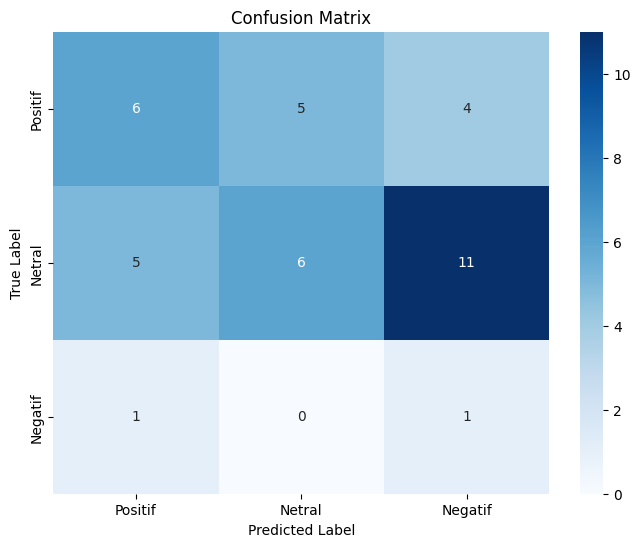


--- Evaluasi Model ---
Macro Precision: 0.3693
Macro Recall: 0.3909
Macro F1-score: 0.3064

Weighted Precision: 0.5032
Weighted Recall: 0.3333
Weighted F1-score: 0.3818

Micro Precision: 0.3333
Micro Recall: 0.3333
Micro F1-score: 0.3333

Classification Report:
              precision    recall  f1-score   support

     Positif       0.50      0.40      0.44        15
      Netral       0.55      0.27      0.36        22
     Negatif       0.06      0.50      0.11         2

    accuracy                           0.33        39
   macro avg       0.37      0.39      0.31        39
weighted avg       0.50      0.33      0.38        39



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Load datasets
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

# Validasi kolom dalam dataset
required_columns = ['sentiment']
if not all(col in test_df.columns for col in required_columns):
    print(f"Error: Kolom yang diperlukan ({', '.join(required_columns)}) tidak ditemukan dalam file test_df.csv.")
else:
    # Simulasi: Menambahkan kolom 'predicted_label' dengan nilai prediksi (contoh)
    # Ganti ini dengan hasil prediksi model Anda
    test_df['predicted_label'] = np.random.choice(['Netral', 'Positif', 'Negatif'], size=len(test_df))

    # Mapping sentimen ke angka
    label_mapping = {'Positif': 0, 'Netral': 1, 'Negatif': 2}

    # Handle NaN values during mapping
    test_df['sentiment'] = test_df['sentiment'].map(label_mapping).fillna(-1).astype(int)
    test_df['predicted_label'] = test_df['predicted_label'].map(label_mapping).fillna(-1).astype(int)

    # Ambil true labels dan predicted labels
    y_true = test_df['sentiment']
    y_pred = test_df['predicted_label']

    # Hitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Hitung Precision, Recall, dan F1-score
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')

    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    precision_micro = precision_score(y_true, y_pred, average='micro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    f1_micro = f1_score(y_true, y_pred, average='micro')

    # Cetak hasil evaluasi
    print("\n--- Evaluasi Model ---")
    print(f"Macro Precision: {precision_macro:.4f}")
    print(f"Macro Recall: {recall_macro:.4f}")
    print(f"Macro F1-score: {f1_macro:.4f}")
    print()
    print(f"Weighted Precision: {precision_weighted:.4f}")
    print(f"Weighted Recall: {recall_weighted:.4f}")
    print(f"Weighted F1-score: {f1_weighted:.4f}")
    print()
    print(f"Micro Precision: {precision_micro:.4f}")
    print(f"Micro Recall: {recall_micro:.4f}")
    print(f"Micro F1-score: {f1_micro:.4f}")

    # Menampilkan laporan lengkap
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=label_mapping.keys()))

# Hasil EvaluasiConfusion Matrix


Kategori: Positif
True Positives (TP): 6
False Positives (FP): 6
True Negatives (TN): 18
False Negatives (FN): 9

Kategori: Netral
True Positives (TP): 6
False Positives (FP): 5
True Negatives (TN): 12
False Negatives (FN): 16

Kategori: Negatif
True Positives (TP): 1
False Positives (FP): 15
True Negatives (TN): 22
False Negatives (FN): 1


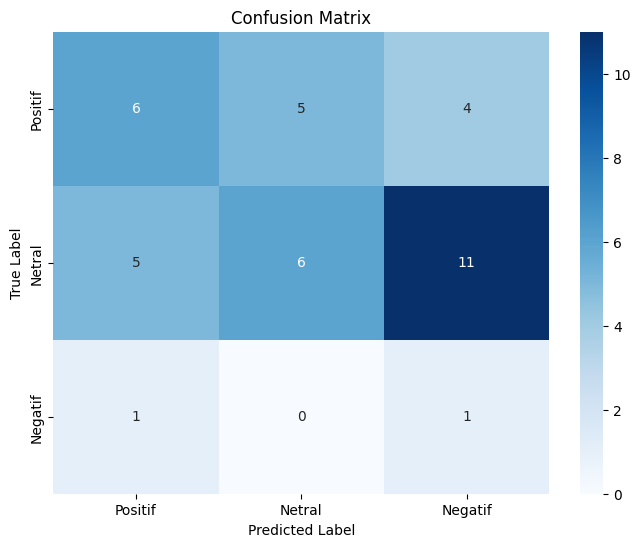

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

# Validasi kolom dalam dataset
required_columns = ['sentiment']
if not all(col in test_df.columns for col in required_columns):
    print(f"Error: Kolom yang diperlukan ({', '.join(required_columns)}) tidak ditemukan dalam file test_baru.csv.")
else:
    # Simulasi: Menambahkan kolom 'predicted_label' dengan nilai prediksi (contoh)
    # Ganti ini dengan hasil prediksi model Anda
    test_df['predicted_label'] = np.random.choice(['Netral', 'Positif', 'Negatif'], size=len(test_df))

    # Mapping sentimen ke angka
    label_mapping = {'Positif': 0, 'Netral': 1, 'Negatif': 2}

    # Handle NaN values during mapping
    test_df['sentiment'] = test_df['sentiment'].map(label_mapping).fillna(-1).astype(int) # Changed to fillna and astype
    test_df['predicted_label'] = test_df['predicted_label'].map(label_mapping).fillna(-1).astype(int) # Changed to fillna and astype


    # Ambil true labels dan predicted labels
    y_true = test_df['sentiment']
    y_pred = test_df['predicted_label']

    # Hitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Ekstrak TP, FP, TN, FN untuk masing-masing kategori
    TP = {label: cm[i, i] for label, i in label_mapping.items()}
    FP = {label: cm[:, i].sum() - cm[i, i] for label, i in label_mapping.items()}
    FN = {label: cm[i, :].sum() - cm[i, i] for label, i in label_mapping.items()}
    TN = {label: cm.sum() - (TP[label] + FP[label] + FN[label]) for label in label_mapping}

    # Print hasil untuk setiap sentimen
    for label, i in label_mapping.items():
        print(f"\nKategori: {label}")
        print(f"True Positives (TP): {TP[label]}")
        print(f"False Positives (FP): {FP[label]}")
        print(f"True Negatives (TN): {TN[label]}")
        print(f"False Negatives (FN): {FN[label]}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()